<a href="https://colab.research.google.com/github/JakeSiewJK64/colabNotebooks/blob/master/opencvPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Playing with openCV</h1></center>

# checking the versio of openCV

In [118]:
import cv2 as cv
cv.__version__

'4.1.2'

# Reading/Displaying images

<class 'numpy.ndarray'>


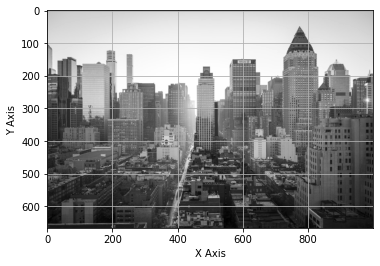

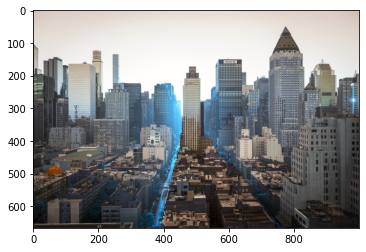

image loaded
<class 'numpy.ndarray'>
(667, 1000, 3)
uint8
[[[207 194 180]
  [208 195 181]]

 [[208 195 181]
  [208 195 181]]]


In [119]:
import matplotlib.pyplot as plt

plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.grid(True)

img = cv.imread('city.jpg', cv.IMREAD_GRAYSCALE) # 2nd parameter: 0 is grayscale, undefined is default
print(type(img))

plt.imshow(img, cmap='gray')
plt.show()

img = cv.imread('city.jpg')
plt.imshow(img)
plt.show()

# checking the image using Numpy array
import numpy as np
img = cv.imread("city.jpg", cv.IMREAD_COLOR)

if img is None:
  print("Image open error")
else:
  print("image loaded")
  print(type(img))
  print(img.shape)
  print(img.dtype)
  print(img[:2, :2, :])

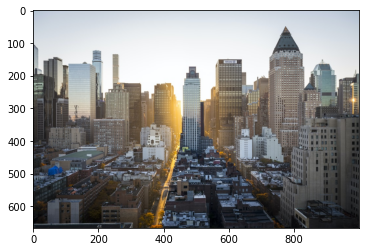

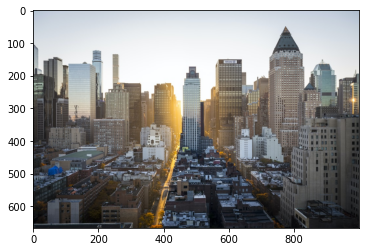

In [120]:
imgrgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()

import numpy as np
imgrgb = img[:,:,::-1]
plt.imshow(imgrgb)
plt.show()

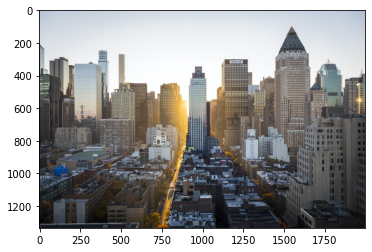

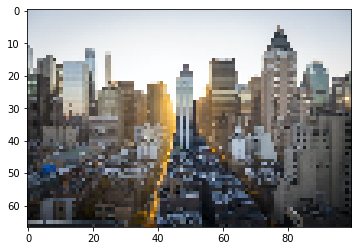

In [121]:
# increasing resolution
res = cv.resize(imgrgb, None, fx = 2, fy = 2, interpolation = cv.INTER_CUBIC)
plt.imshow(res)
plt.show()

# decreasing the resolution
res = cv.resize(imgrgb, None, fx = .1, fy = .1, interpolation = cv.INTER_CUBIC)
plt.imshow(res)
plt.show()

# Reading videos

In [122]:
video_capture = cv.VideoCapture("lfd.ideo.mp4")
while video_capture.isOpened():
    success, frame = video_capture.read()

    clear_output(wait=True)
    img = arrayShow(frame)
    display(img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

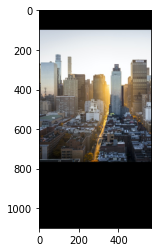

In [123]:
#@title Transformation Parameters { run: "auto" }

theta_degrees = 0 #@param {type:"slider", min:0, max:360, step:10}
shift_x = -100 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = 100 #@param {type:"slider", min:-100, max:100, step:2}

PI = np.pi

x, y, _ = imgrgb.shape
radians = theta_degrees * PI / 100

MATRIX = [
          [np.cos(radians), -np.sin(radians), shift_x],
          [np.sin(radians), np.cos(radians), shift_y]
]

MATRIX = np.array(MATRIX)
x += int(shift_x)
y += int(shift_y)

res = cv.warpAffine(imgrgb, MATRIX, (x, y))

plt.imshow(res)
plt.show()


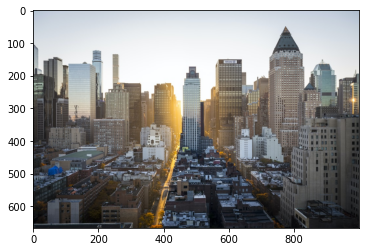

In [124]:
import cv2 as cv
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Drawing images using OpenCV

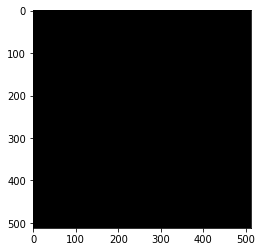

In [125]:
img2 = np.zeros((512, 512, 3))
plt.imshow(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


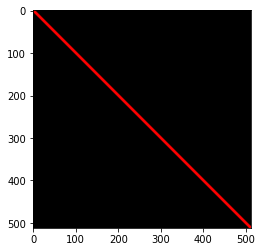

In [126]:
# draw a line using cv2.line(image, startPoint, endPoint, rgb, thickness)
cv.line(img2, (0,0), (511,511), (255,0,0), 5)
plt.imshow(img2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


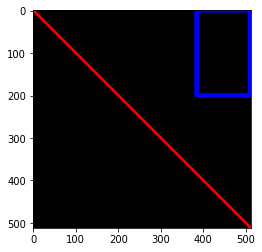

In [127]:
# draw a rectangle using cv2.rectangle(image, start, end, rgb, thickness)
cv.rectangle(img2, (384, 0), (510, 200), (0, 0, 255), 10)
plt.imshow(img2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


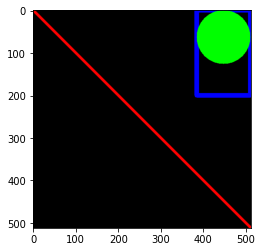

In [128]:
# draw a circle using cv2.circle(image, center, radius, rgb, thickness)
cv.circle(img2, (447, 63), 63, (0,255,0), -1)
plt.imshow(img2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


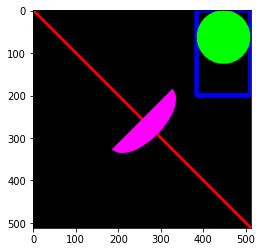

In [129]:
# draw an ecllipse using cv2.eclipse(image, center, axes, angle, start, end, rgb, thickness)
cv.ellipse(img2, (256,256), (100,50), -45, 0, 180, (255,0,255), -1)
plt.imshow(img2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 10  10]]

 [[150 200]]

 [[300 150]]

 [[200  50]]]


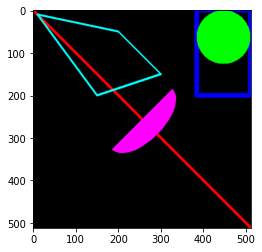

In [130]:
# draw a line using polylines
# image
# points
# isClosed
# rgb
# thickness
# lineType
# shift
pts = np.array([
               [10,10],
               [150, 200],
               [300,150],
               [200, 50]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.polylines(img2, [pts],True,(0,255,255), 3)
print(pts)
plt.imshow(img2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

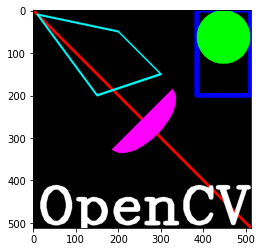

In [131]:
# adding text to the graph
# putText() function parameters
# image
# text, 
# coordinates
# font 
# font scale
# rgb
# thickness
# line type
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(img2, "OpenCV", (10, 500), font, 4, (255,255,255), 10, cv.LINE_AA)
plt.imshow(img2)
plt.plot()

# Modifying pixels

In [132]:
# accessing a single pixel on an image
img = cv.imread("city.jpg", cv.IMREAD_COLOR)
img[50, 245]

array([233, 227, 222], dtype=uint8)

In [133]:
# changing pixel values
for i in range(5):
  for j in range(5):
    img[50 + i, 235 + j] = (0, 255, 0)

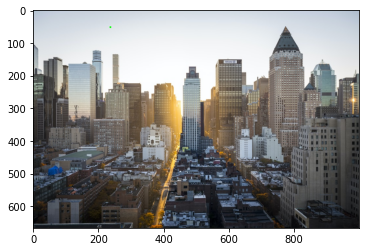

In [134]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# image ROI (Region of Interest)

[]

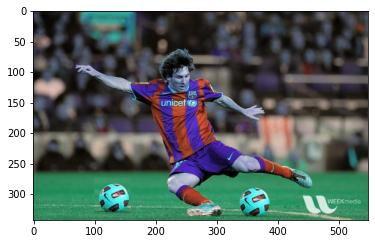

In [135]:
# getting the coordinate of the ball
img = cv.imread('messi.jpg')

plt.imshow(img)
plt.plot()

ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

plt.imshow(img)
plt.plot()

# References
- [Basic Operations on Images](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_basic_ops/py_basic_ops.html)

- [Drawing Functions in OpenCV](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html)

# Edge detection

In [146]:
import numpy as np
import cv2 as cv
%matplotlib inline
import matplotlib.pyplot as plt

[]

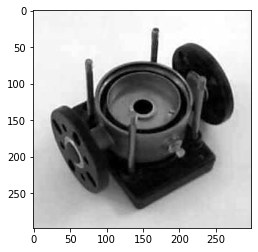

In [147]:
# loading wheel.png as input image
img = cv.imread('wheel.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.plot()

[]

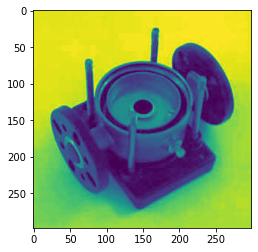

In [148]:
# without using cmap='gray'
plt.imshow(img)
plt.plot()

In [149]:
print('dtype: {}'.format(img.dtype))
print('shape: {}'.format(img.shape))

dtype: uint8
shape: (298, 299)


# Edge Detection using Sobel Operator
types:
- sobelx operation
- sobely operation
- sobel operation


[]

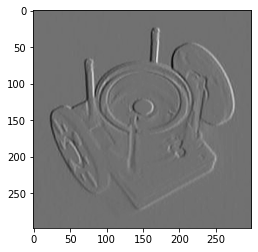

In [150]:
ddepth = cv.CV_64F
dx = 1
dy = 0
sobelx = cv.Sobel(img, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray') # no cmap = blue green
plt.plot()

In [151]:
# experimenting with Sobel Functions
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1)
sobel = cv.sqrt(cv.addWeighted(cv.pow(sobelx, 2), 1, cv.pow(sobely, 2), 1, 0))

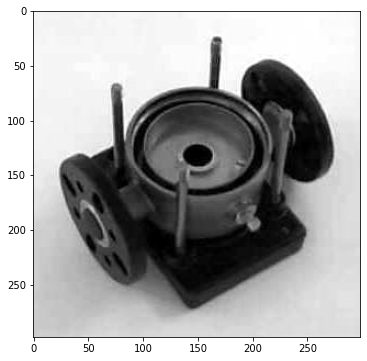

In [152]:
# Input Image
# no operation has been applied
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')

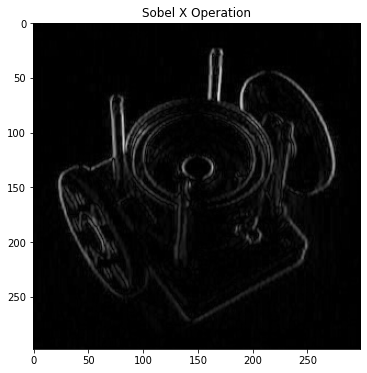

In [153]:
# Sobel X Operation
plt.figure(figsize=(6,6))
plt.title('Sobel X Operation')
plt.imshow(cv.absdiff(sobelx, 0), cmap='gray')

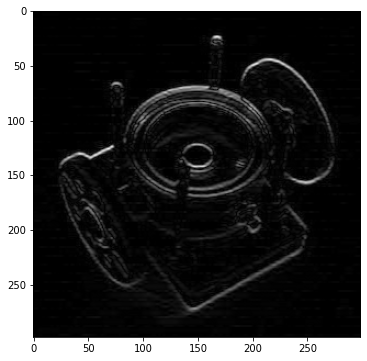

In [154]:
# Sobel Y operation
plt.figure(figsize=(6,6))
plt.imshow(cv.absdiff(sobely, 0), cmap='gray')

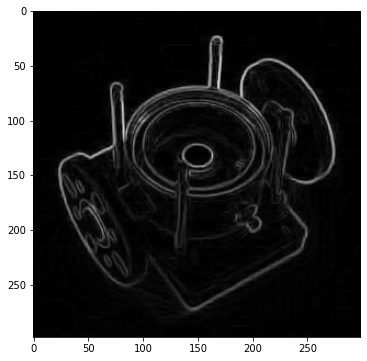

In [155]:
# Sobel Intensity
plt.figure(figsize=(6,6))
plt.imshow(cv.absdiff(sobel, 0), cmap='gray')

# Canny Edge Detection

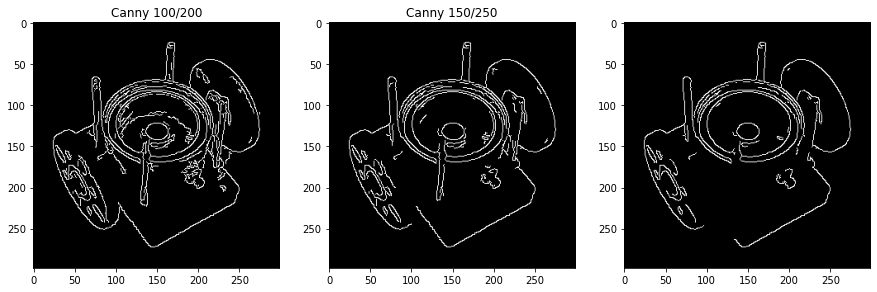

In [156]:
# image = 8 bit grayscale input image
# threshold1/threshold2 = threshold for hysteresis procedure
# AperatureSize = for Sobel Operator
# L2gradient = A flag. L2-norm for gradients = True; L1-form for False
threshold1 = 100
threshold2 = 200

# multiples of 50
canny1 = cv.Canny(img, 50, 150)
canny2 = cv.Canny(img, 100, 200)
canny3 = cv.Canny(img, 150, 250)

plt.figure(figsize=(15,15))

# Canny 50/150
plt.title('Canny 50/150')
plt.subplot(1, 3, 1)
plt.imshow(canny1, cmap='gray')

# Canny 100/200
plt.title('Canny 100/200')
plt.subplot(1, 3, 2)
plt.imshow(canny2, cmap='gray')

# Canny 150/250
plt.title('Canny 150/250')
plt.subplot(1, 3, 3)
plt.imshow(canny3, cmap='gray')

# display the subplots
plt.show()

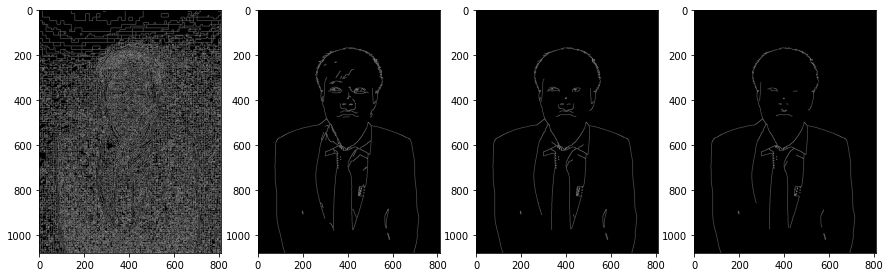

In [143]:
img = cv.imread('/content/jake.jpg')

# multiples of 50
canny = cv.Canny(img, 1, 0)
canny1 = cv.Canny(img, 50, 150)
canny2 = cv.Canny(img, 100, 200)
canny3 = cv.Canny(img, 150, 250)

cannyList = [canny, canny1, canny2, canny3]

plt.figure(figsize=(15,15))

for i in range(1, 5):
  plt.subplot(1,4,i)
  plt.imshow(cannyList[i - 1], cmap='gray')